In [7]:
from os import listdir
import pandas as pd 
import re
from collections import Counter
from nltk import tokenize
import matplotlib.pyplot as plt


In [2]:
def load_data_to_pandas():
    data = {}
    for file_name in listdir('articles/'):
        text = ''
        file = open('articles/'+file_name, "r")
        for line in file:
            text += line
        data[file_name] = text
    data_frame = pd.DataFrame(data.items(), columns=['Source', 'Article'])
    return data_frame
df = load_data_to_pandas()    

In [3]:
df

,Source,Article
0,daily mail,\nUS rapper Kanye West broke down in tears on...
1,fox news,"\nRapper Kanye West, in his first event since..."
2,sun,A SOBBING Kanye West revealed he stopped Kim K...
3,al jazeera,"Rapper, designer and former Trump supporter l..."
4,dw,US rapper Kanye West has held his first electi...
5,ny post,\nKanye West — who claims to be running for p...
6,washington post,"COLUMBIA, S.C. — Rapper Kanye West, in his fir..."
7,usa today,"\nRapper Kanye West, who announced his intent..."
8,bbc,Kanye West has officially launched his campaig...
9,rt,Kanye West kicked off his first campaign rall...


In [4]:
def alpha_chars_ratio(article):
    count = 0 
    total = 0
    for char in article:
        total += 1
        if char.isalpha():
            count += 1
    return count/total

def digit_chars_ratio(article):
    count = 0
    total = 0
    for char in article:
        total += 1
        if char.isdigit():
            count += 1
    return count/total

def upper_chars_ratio(article):
    count = 0 
    total = 0 
    for char in article:
        total += 1
        if char.isupper():
            count += 1
    return count/total

def white_chars_ratio(article):
    count = 0 
    total = 0 
    for char in article:
        total += 1
        if char.isspace():
            count += 1
    return count/total

def counter_of_words(article):
    article = article.lower()
    article = re.sub("[^\w ]", "", article)
    words = article.split(" ")
    return Counter(words)

def total_number_of_words(article):
    counter = counter_of_words(article)
    total = 0
    for item, value in counter.items():
        total += value
    return total

def size_of_vocabulary(article):
    counter = counter_of_words(article)
    return len(list(counter.keys()))

def type_token_ratio(article):
    return size_of_vocabulary(article)/total_number_of_words(article)

# words occuring once
def hapax_legomena(article):
    counter = counter_of_words(article)
    total = 0 
    for item, value in counter.items():
        if value == 1:
            total += 1
    return total

def hapax_dislegomena(article):
    counter = counter_of_words(article)
    total = 0 
    for item, value in counter.items():
        if value == 2:
            total += 1
    return total

def average_word_length(article):
    counter = counter_of_words(article)
    total_length = 0
    size = len(list(counter.keys()))
    for word in counter.keys():
        total_length += len(word)
    return total_length/size

def average_sentence_char_length(article):
    sentences = tokenize.sent_tokenize(article)
    size = len(sentences)
    total = 0 
    for sentence in sentences:
        for char in sentence:
            total += 1
    return total/size

def average_sentence_word_length(article):
    sentences = tokenize.sent_tokenize(article)
    size = len(sentences)
    total = 0
    for sentence in sentences:
        counter = counter_of_words(sentence)
        for item, value in counter.items():
            total += value
    return total/size
        

In [5]:
df['alpha-chars-ratio'] = df['Article'].apply(alpha_chars_ratio)
df['digit-chars-ratio'] = df['Article'].apply(digit_chars_ratio)
df['upper-chars-ratio'] = df['Article'].apply(upper_chars_ratio)
df['white-chars-ratio'] = df['Article'].apply(white_chars_ratio)
df['number-of-words'] = df['Article'].apply(total_number_of_words)
df['size-of-vocabulary'] = df['Article'].apply(size_of_vocabulary)
df['type-token-ratio'] = df['Article'].apply(type_token_ratio)
df['hapax-legomena'] = df['Article'].apply(hapax_legomena)
df['hapax-dislegomena'] = df['Article'].apply(hapax_dislegomena)
df['average-word-length'] = df['Article'].apply(average_word_length)
df['average-sentence-char-length'] = df['Article'].apply(average_sentence_char_length)
df['average-sentence-word-length'] = df['Article'].apply(average_sentence_word_length)

In [6]:
df

,Source,Article,alpha-chars-ratio,digit-chars-ratio,upper-chars-ratio,white-chars-ratio,number-of-words,size-of-vocabulary,type-token-ratio,hapax-legomena,hapax-dislegomena,average-word-length,average-sentence-char-length,average-sentence-word-length
0,daily mail,\nUS rapper Kanye West broke down in tears on...,0.785526,0.004754,0.032752,0.177496,313,198,0.632588,147,29,5.646465,116.625000,20.250000
1,fox news,"\nRapper Kanye West, in his first event since...",0.795588,0.005515,0.022794,0.169853,435,267,0.613793,200,38,5.988764,122.090909,20.318182
2,sun,A SOBBING Kanye West revealed he stopped Kim K...,0.766447,0.008772,0.032895,0.182018,452,260,0.575221,190,39,5.715385,99.592593,17.481481
3,al jazeera,"Rapper, designer and former Trump supporter l...",0.794943,0.005977,0.026207,0.171954,349,222,0.636103,172,26,5.914414,126.176471,21.117647
4,dw,US rapper Kanye West has held his first electi...,0.811413,0.003804,0.020652,0.160326,280,196,0.700000,161,18,6.127551,113.437500,17.875000
5,ny post,\nKanye West — who claims to be running for p...,0.773918,0.012827,0.030465,0.178514,309,199,0.644013,156,26,5.753769,154.166667,26.500000
6,washington post,"COLUMBIA, S.C. — Rapper Kanye West, in his fir...",0.807055,0.007483,0.025120,0.161411,286,188,0.657343,143,30,6.281915,132.000000,20.928571
7,usa today,"\nRapper Kanye West, who announced his intent...",0.779151,0.010023,0.030404,0.176412,499,286,0.573146,209,44,5.681818,105.321429,18.178571
8,bbc,Kanye West has officially launched his campaig...,0.783671,0.007822,0.023711,0.177218,674,363,0.538576,270,43,6.063361,118.588235,20.588235
9,rt,Kanye West kicked off his first campaign rall...,0.798088,0.000382,0.019120,0.169025,422,259,0.613744,194,42,5.953668,143.666667,23.944444


<BarContainer object of 12 artists>

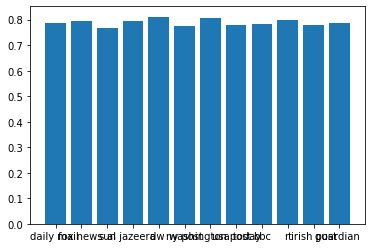

In [9]:
plt.bar(df['Source'], df['alpha-chars-ratio'])

<BarContainer object of 12 artists>

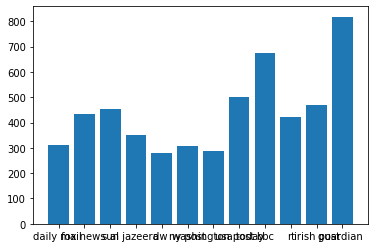

In [10]:
plt.bar(df['Source'], df['number-of-words'])